In [7]:
from keras.datasets import imdb

In [8]:
((XT, YT), (Xt, Yt)) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [9]:
print(XT.shape)
print(YT.shape)

(25000,)
(25000,)


In [10]:
words_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [11]:
index_words = dict([(v, k) for k, v in words_index.items()])

In [12]:
actual_review = " ".join([index_words.get(idx-3, "") for idx in XT[0]])
print(actual_review)
print(len(actual_review))

 this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the 

In [13]:
from keras.preprocessing import sequence

xtrain = sequence.pad_sequences(XT, maxlen=500)
xtest = sequence.pad_sequences(Xt, maxlen=500)

print(xtrain.shape, xtest.shape)

(25000, 500) (25000, 500)


In [14]:
from keras.layers import Embedding, Dense, SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(10000, 64))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          640000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 643137 (2.45 MB)
Trainable params: 643137 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='rmsprop')

In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_loss",
    save_best_only=True,
    verbose=0,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    initial_value_threshold=None,
)

earlystop = EarlyStopping(monitor='val_accuracy', patience=2)
hist = model.fit(xtrain, YT, epochs=10, validation_split=0.2, batch_size=128, callbacks=[checkpoint, earlystop])

Epoch 1/10
157/157 [==============================] - 75s 479ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 1.0522 - val_accuracy: 0.7810
Epoch 2/10
157/157 [==============================] - 78s 499ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 1.0127 - val_accuracy: 0.7962
Epoch 3/10
157/157 [==============================] - 78s 497ms/step - loss: 0.0085 - accuracy: 0.9970 - val_loss: 0.9911 - val_accuracy: 0.8032
Epoch 4/10
157/157 [==============================] - 77s 491ms/step - loss: 0.0120 - accuracy: 0.9973 - val_loss: 0.9783 - val_accuracy: 0.7998
Epoch 5/10
157/157 [==============================] - 77s 489ms/step - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.9543 - val_accuracy: 0.8198
Epoch 6/10
157/157 [==============================] - 77s 489ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.9720 - val_accuracy: 0.8154
Epoch 7/10
157/157 [==============================] - 76s 487ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 1.4879 - val_ac

In [32]:
h = hist.history

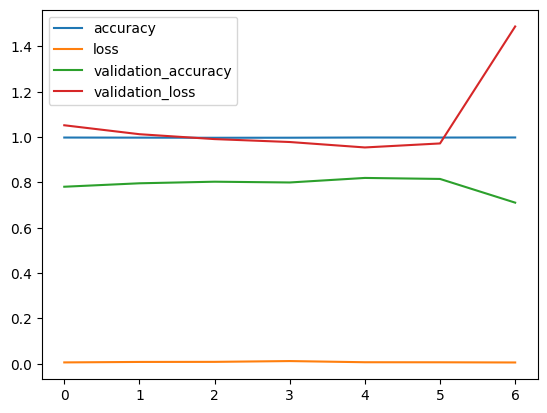

In [33]:
import matplotlib.pyplot as plt

def plothist(h):
  acc = h['accuracy']
  val_accuracy = h['val_accuracy']
  loss = h['loss']
  val_loss = h['val_loss']

  plt.plot(acc, label='accuracy')
  plt.plot(loss, label='loss')
  plt.plot(val_accuracy, label='validation_accuracy')
  plt.plot(val_loss, label='validation_loss')
  plt.legend()
  plt.show()

plothist(h)

In [34]:
# model.save('imdb_reviews_classification.h5')

In [35]:
# model.load_weights('imdb_reviews_classification.h5')
model.load_weights('best_model.h5')

In [36]:
model.evaluate(xtest, Yt)

782/782 [==============================] - 33s 42ms/step - loss: 0.9850 - accuracy: 0.8114


[0.9850120544433594, 0.8114399909973145]

In [37]:
model.evaluate(xtrain, YT)

782/782 [==============================] - 34s 44ms/step - loss: 0.1915 - accuracy: 0.9638


[0.19151468575000763, 0.9638400077819824]